In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### World Happiness Report Project
#### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

##### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

##### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

##### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
print("The dimensions of the dataset:", df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimensions of the dataset: (158, 12)

The column headers in the dataset: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
#Checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<Axes: >

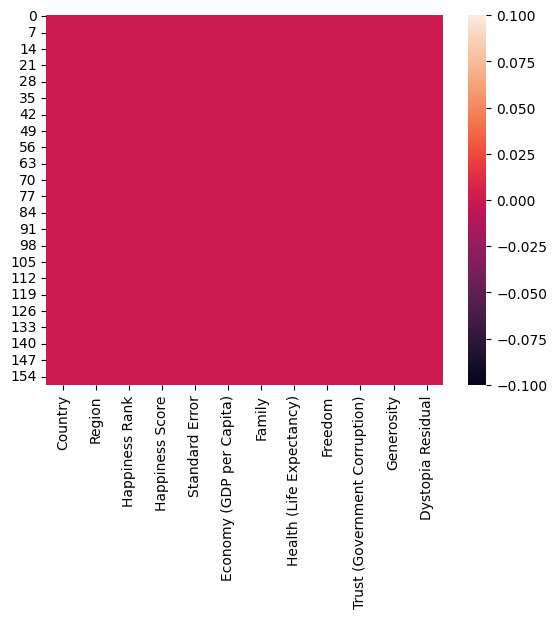

In [8]:
#Let's visualize it using heatmap
sns.heatmap(df.isnull())

In [9]:
#setting Happiness Rank as dataframe index
df.set_index('Happiness Rank', inplace=True)

In [10]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [11]:
#Checking the number of unique values in each column
df.nunique().to_frame("Number of unique values")

,Number of unique values
Country,158
Region,10
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158


In [12]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: count, 

In [13]:
df.drop(["Standard Error"], axis=1, inplace=True)

In [14]:
df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
print("Total Duplicate Rows are ", df.duplicated().sum())

Total Duplicate Rows are  0


In [16]:
#Statistical summary of numerical columns
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect, since there are no
negative/invalid values present.

From the above description we can observe the following:

    -- The counts of all the columns are same which means there is no missing values in the dataset.
    
    -- The median(50%) value is greater than the mean in Economy(GDP per Capita), Family columns which means the data is skewed to
    left in these columns.
    
    -- By summarizing the data, we can observe that there is huge difference between 75%(third quartile) and maximum values, so there are outliers present in the data.
    
    -- We can also notice the Standard deviation, minimum value, 25% values from the describe() method.

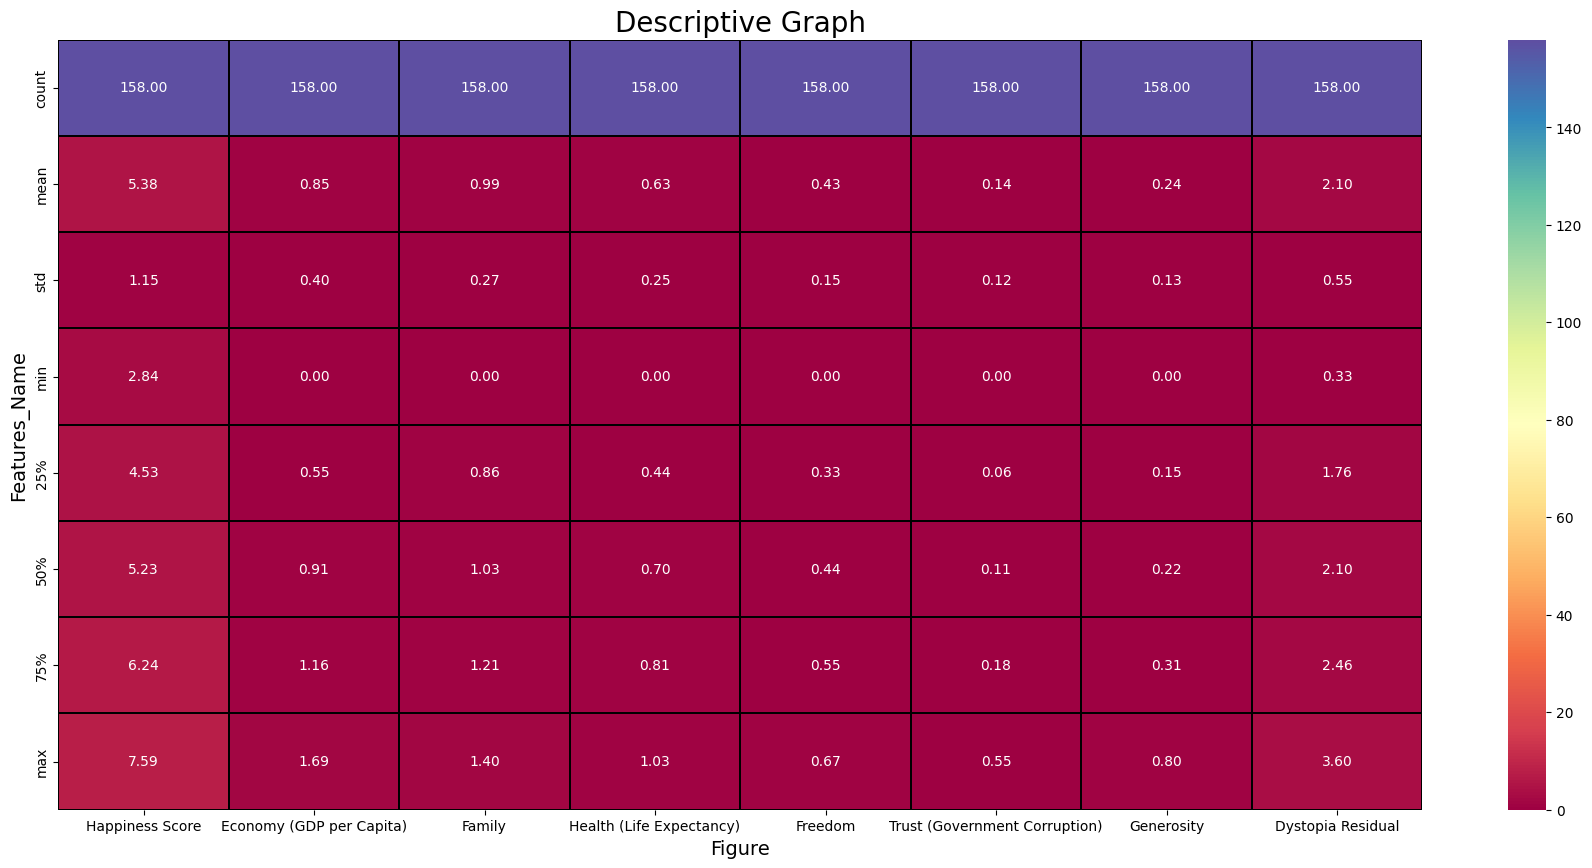

In [17]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel("Figure", fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

In [18]:
df.loc[1]

Country                             Switzerland
Region                           Western Europe
Happiness Score                           7.587
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 1, dtype: object

In [19]:
df.loc[158]

Country                                        Togo
Region                           Sub-Saharan Africa
Happiness Score                               2.839
Economy (GDP per Capita)                    0.20868
Family                                      0.13995
Health (Life Expectancy)                    0.28443
Freedom                                     0.36453
Trust (Government Corruption)               0.10731
Generosity                                  0.16681
Dystopia Residual                           1.56726
Name: 158, dtype: object

In [20]:
df1 = df.drop("Country", axis='columns')

In [21]:
df1 = df1.drop("Region", axis='columns')

In [30]:
df1.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,
1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


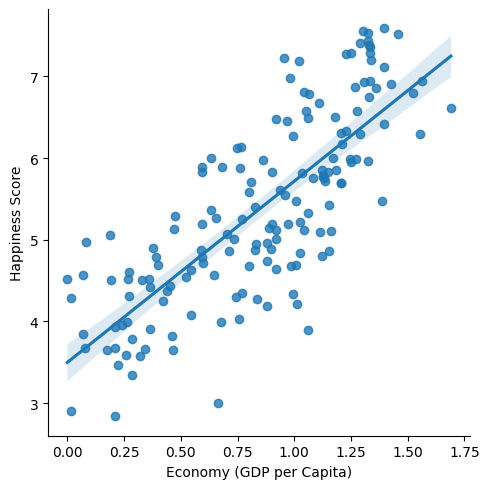

In [23]:
sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df1, palette='colorblind')

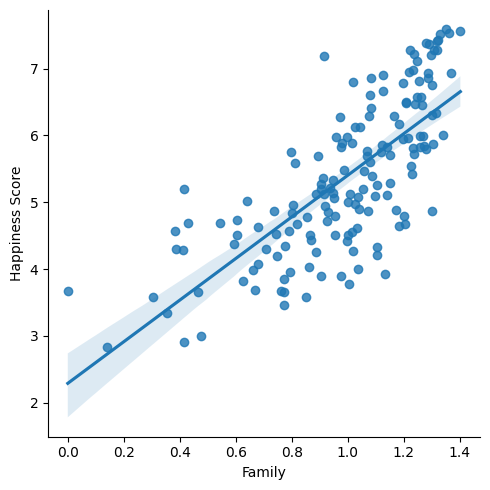

In [24]:
sns.lmplot(x='Family', y='Happiness Score', data=df1, palette='colorblind')

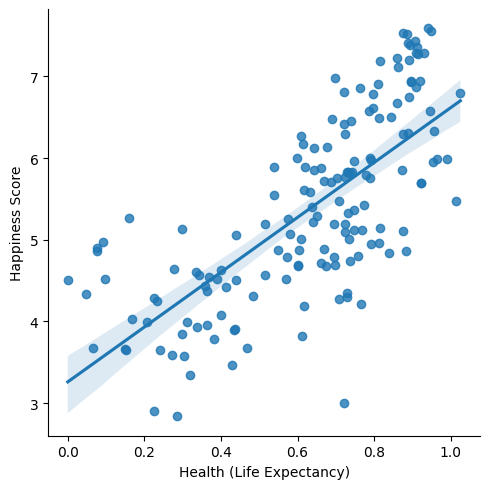

In [25]:
sns.lmplot(x='Health (Life Expectancy)', y='Happiness Score', data=df1, palette='colorblind')

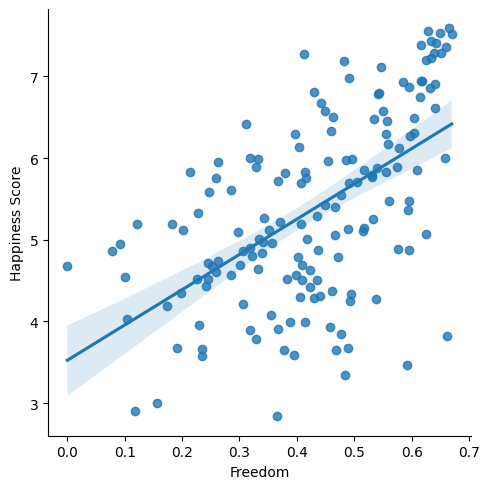

In [26]:
sns.lmplot(x='Freedom', y='Happiness Score', data=df1, palette='colorblind')

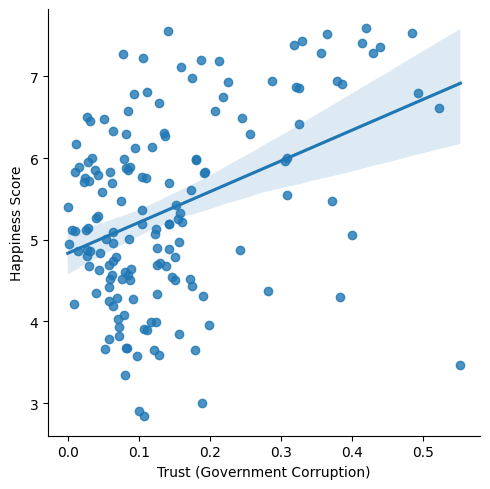

In [27]:
sns.lmplot(x='Trust (Government Corruption)', y='Happiness Score', data=df1, palette='colorblind')

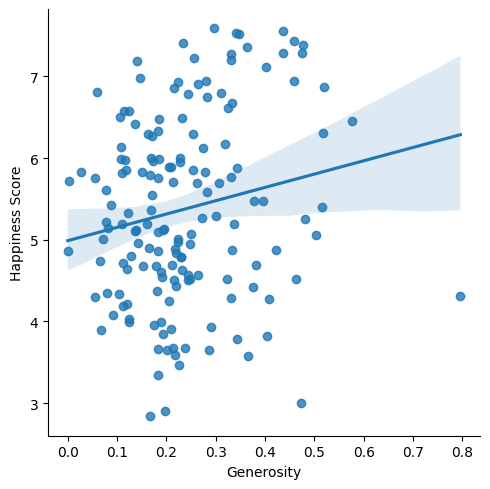

In [28]:
sns.lmplot(x='Generosity', y='Happiness Score', data=df1, palette='colorblind')

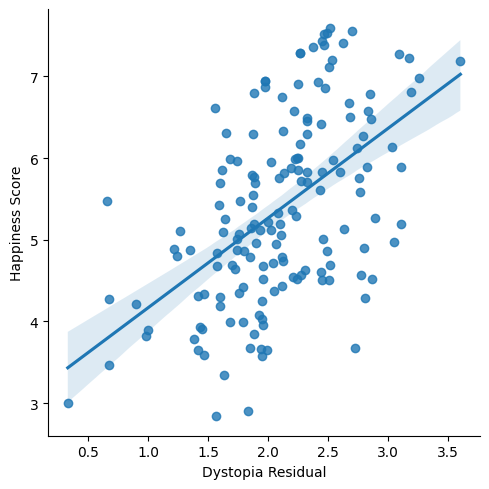

In [29]:
sns.lmplot(x='Dystopia Residual', y='Happiness Score', data=df1, palette='colorblind')

In [31]:
#Now we will check the correlation between features using Corr()
df1.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [32]:
df2 = df1.drop("Happiness Score", axis='columns')

In [33]:
df2.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,
1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


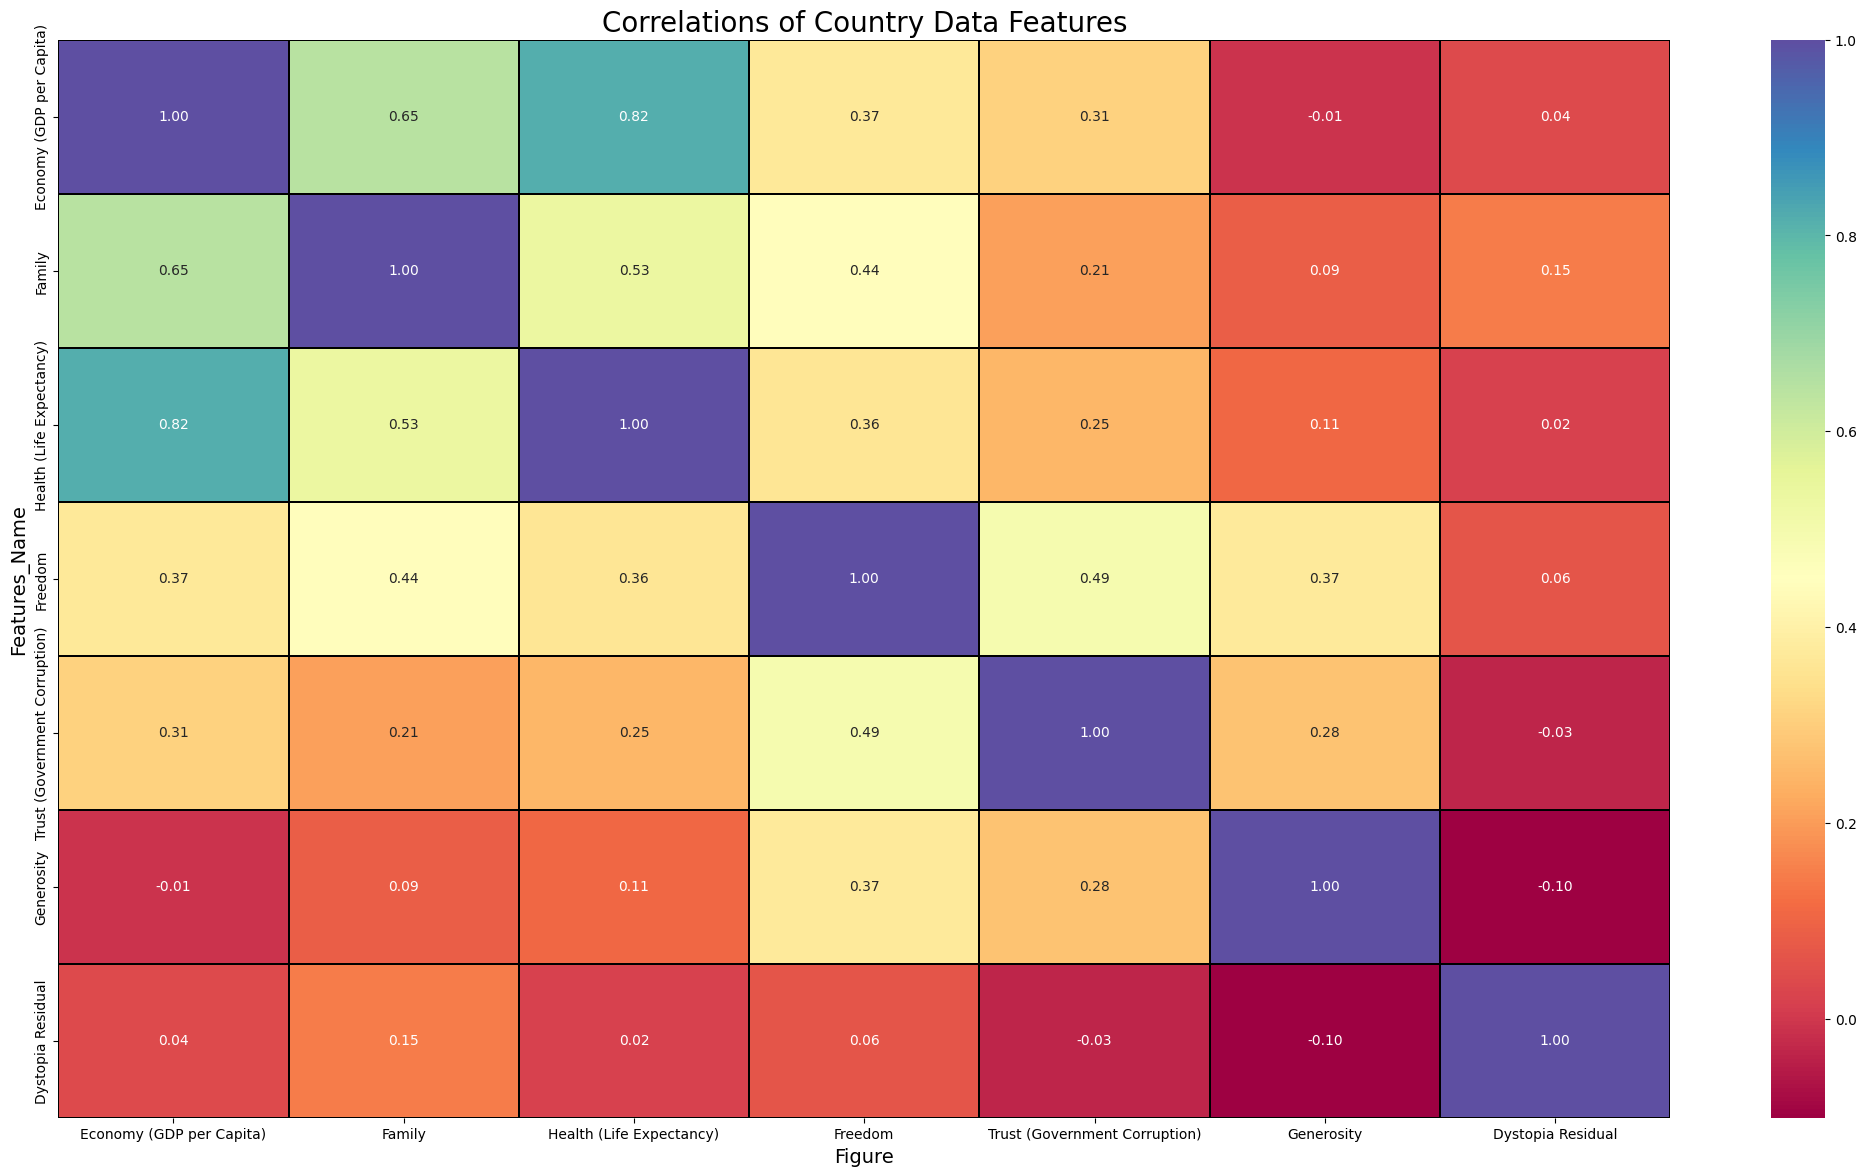

In [35]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel("Figure", fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Correlations of Country Data Features", fontsize=20)
plt.show()

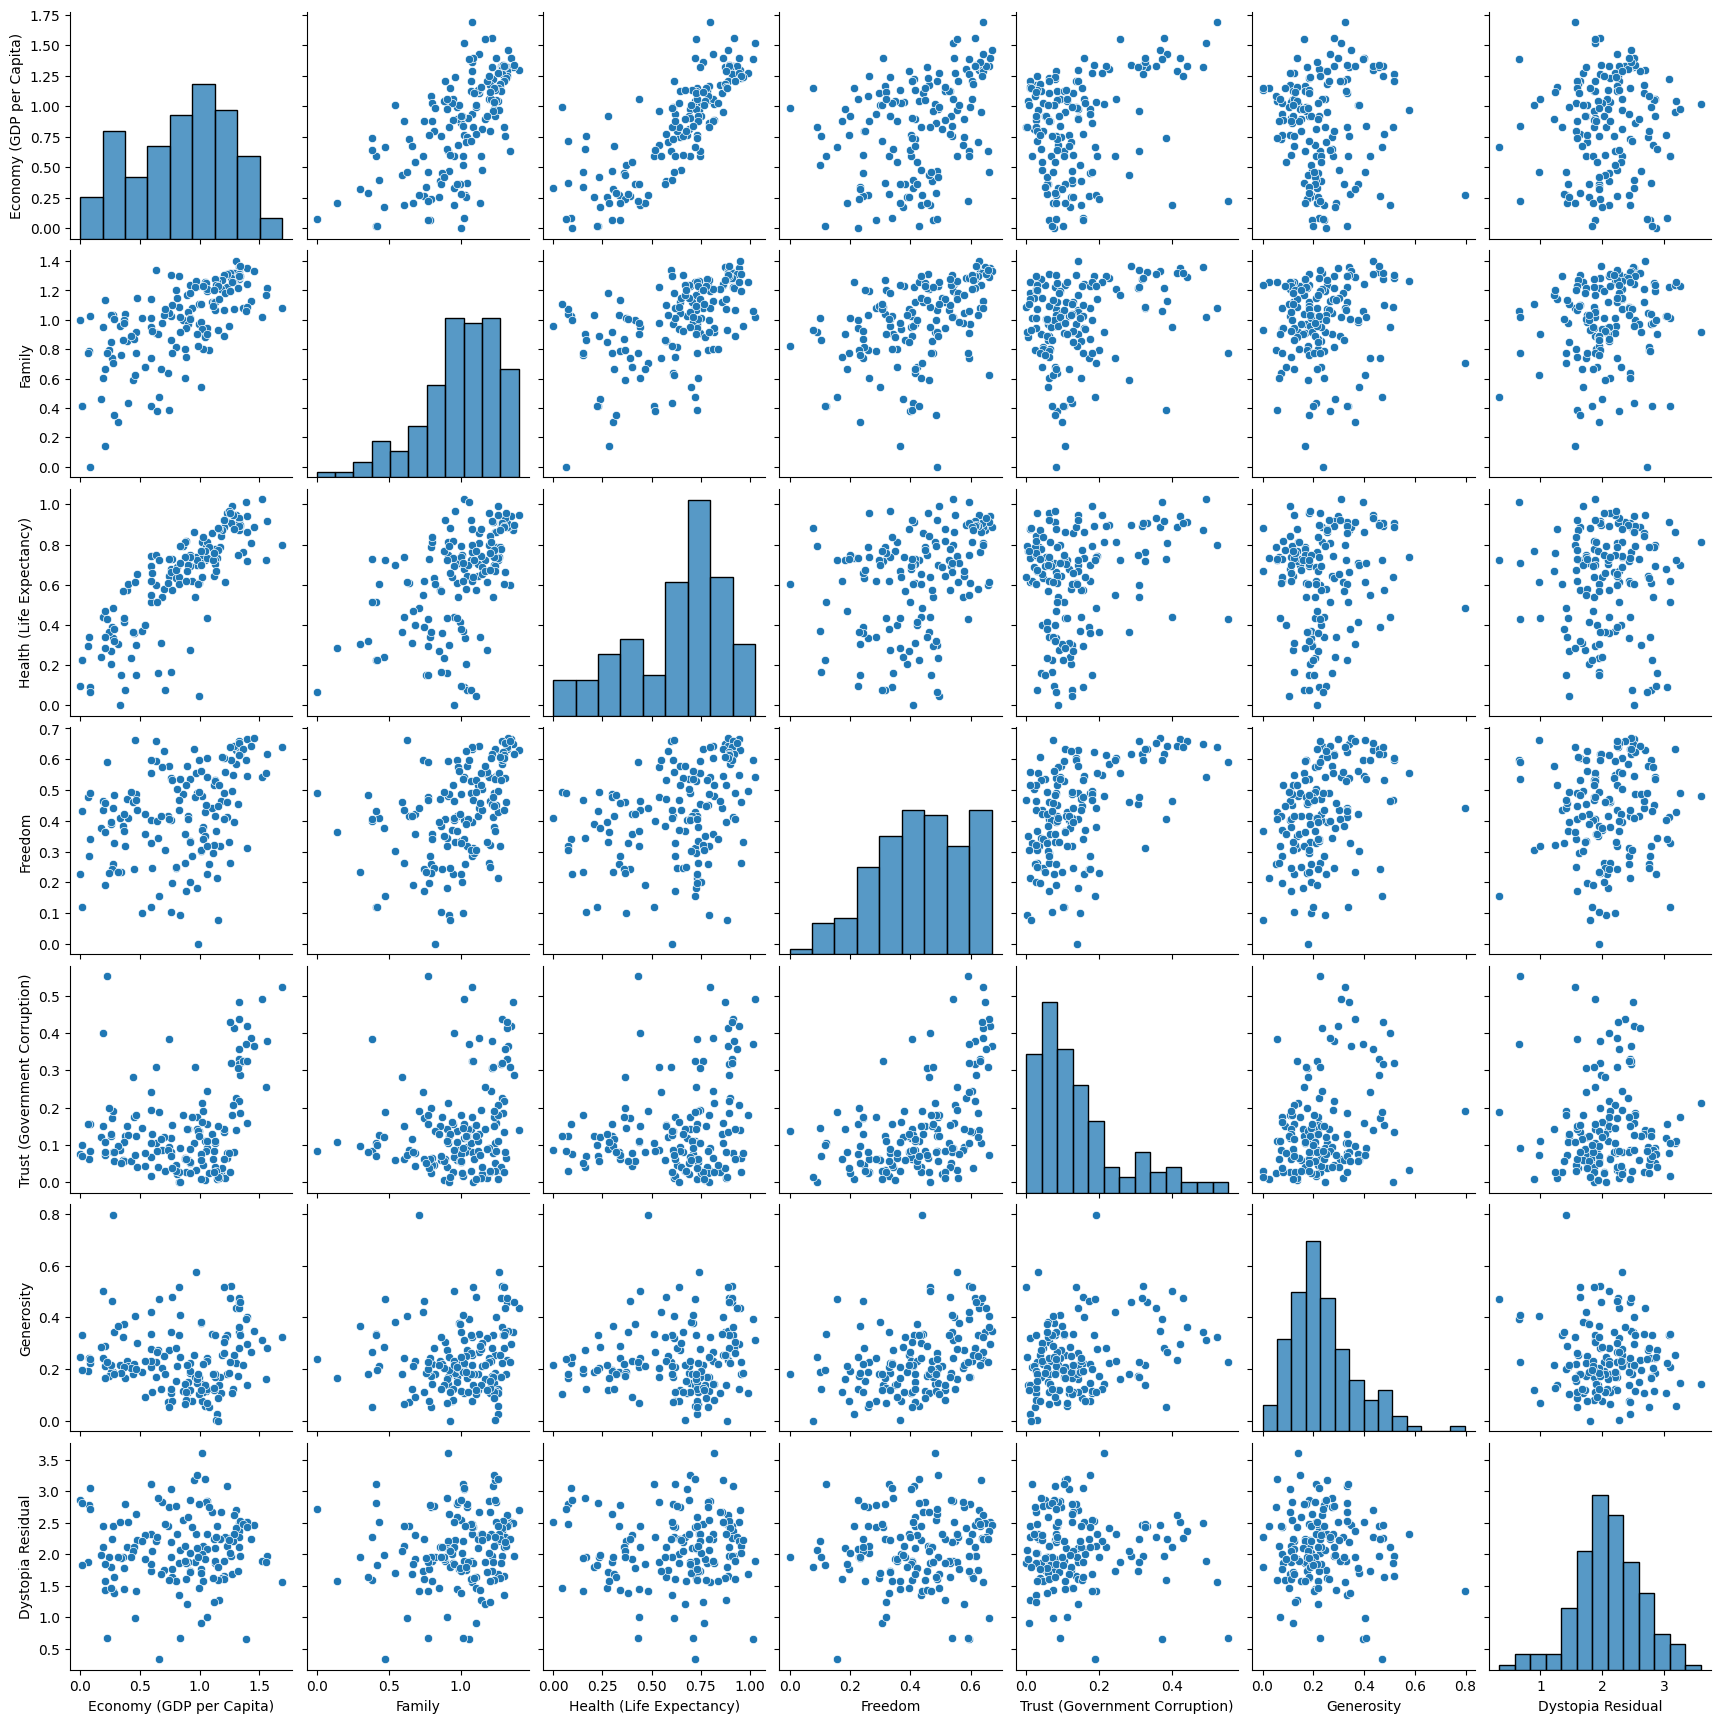

In [36]:
sns.pairplot(data=df2, palette='Dark2')

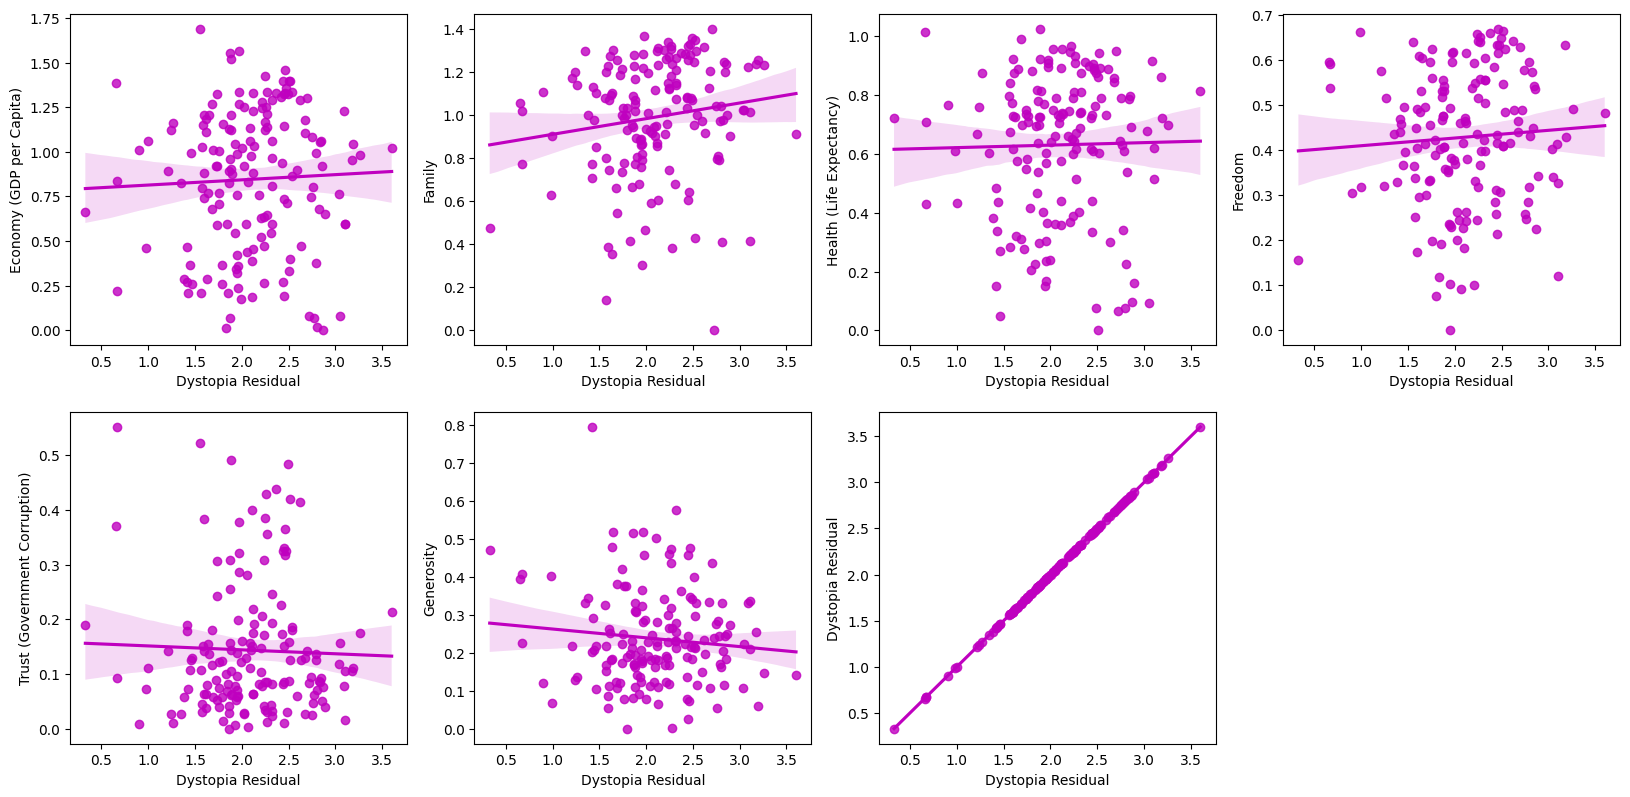

In [39]:
plt.figure(figsize=(20,25))
p=1
for i in df2:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='Dystopia Residual',y=i,data=df2,color='m')
        plt.xlabel("Dystopia Residual")
        plt.ylabel(i)
    p+=1
    
plt.show()

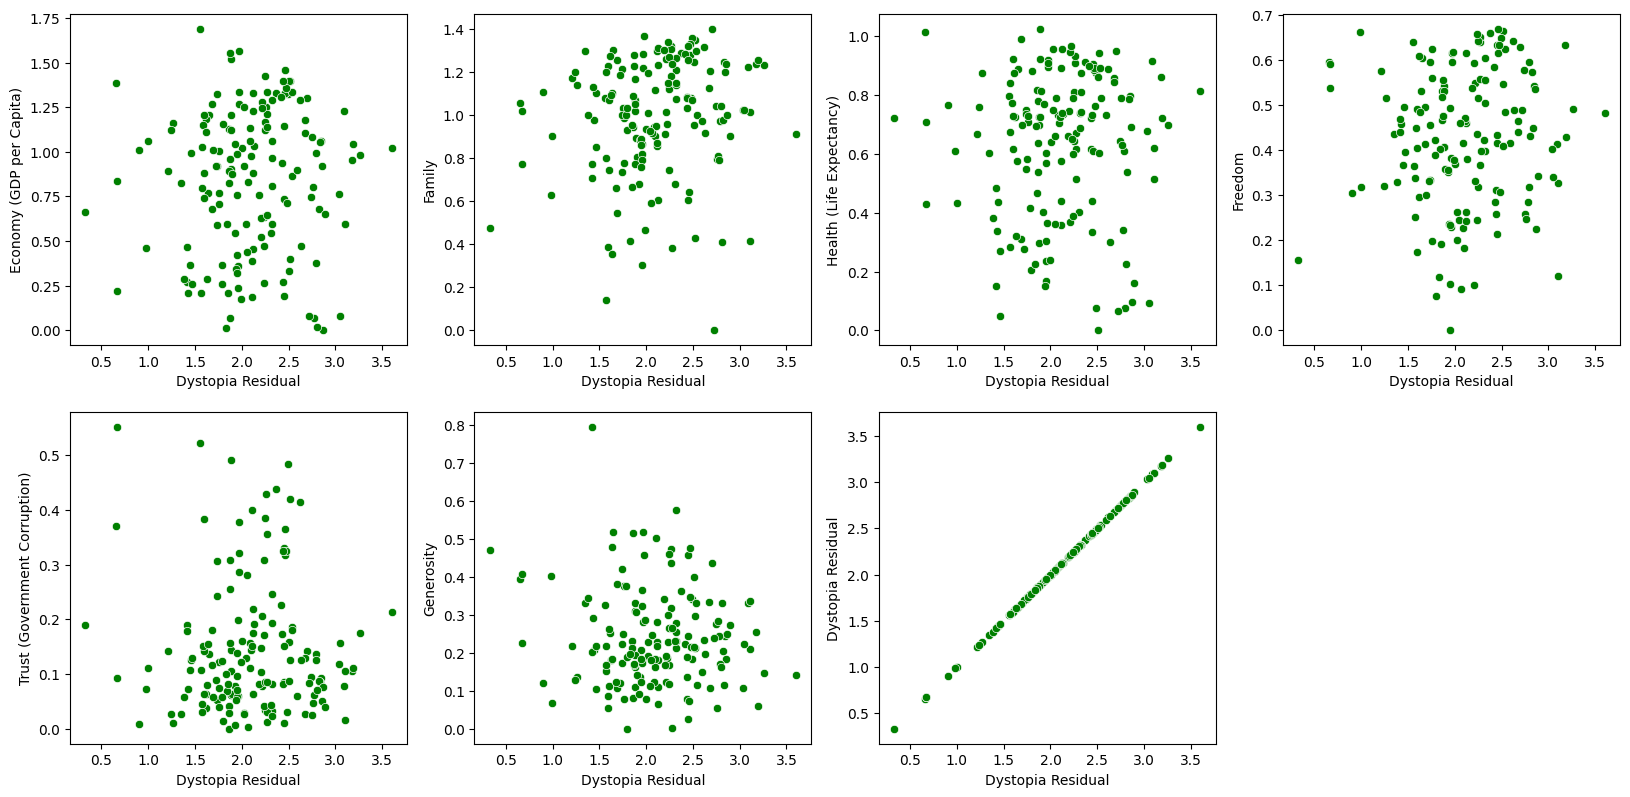

In [40]:
plt.figure(figsize=(20,25))
p=1
for i in df2:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Dystopia Residual',y=i,data=df2,color='g')
        plt.xlabel("Dystopia Residual")
        plt.ylabel(i)
    p+=1
    
plt.show()

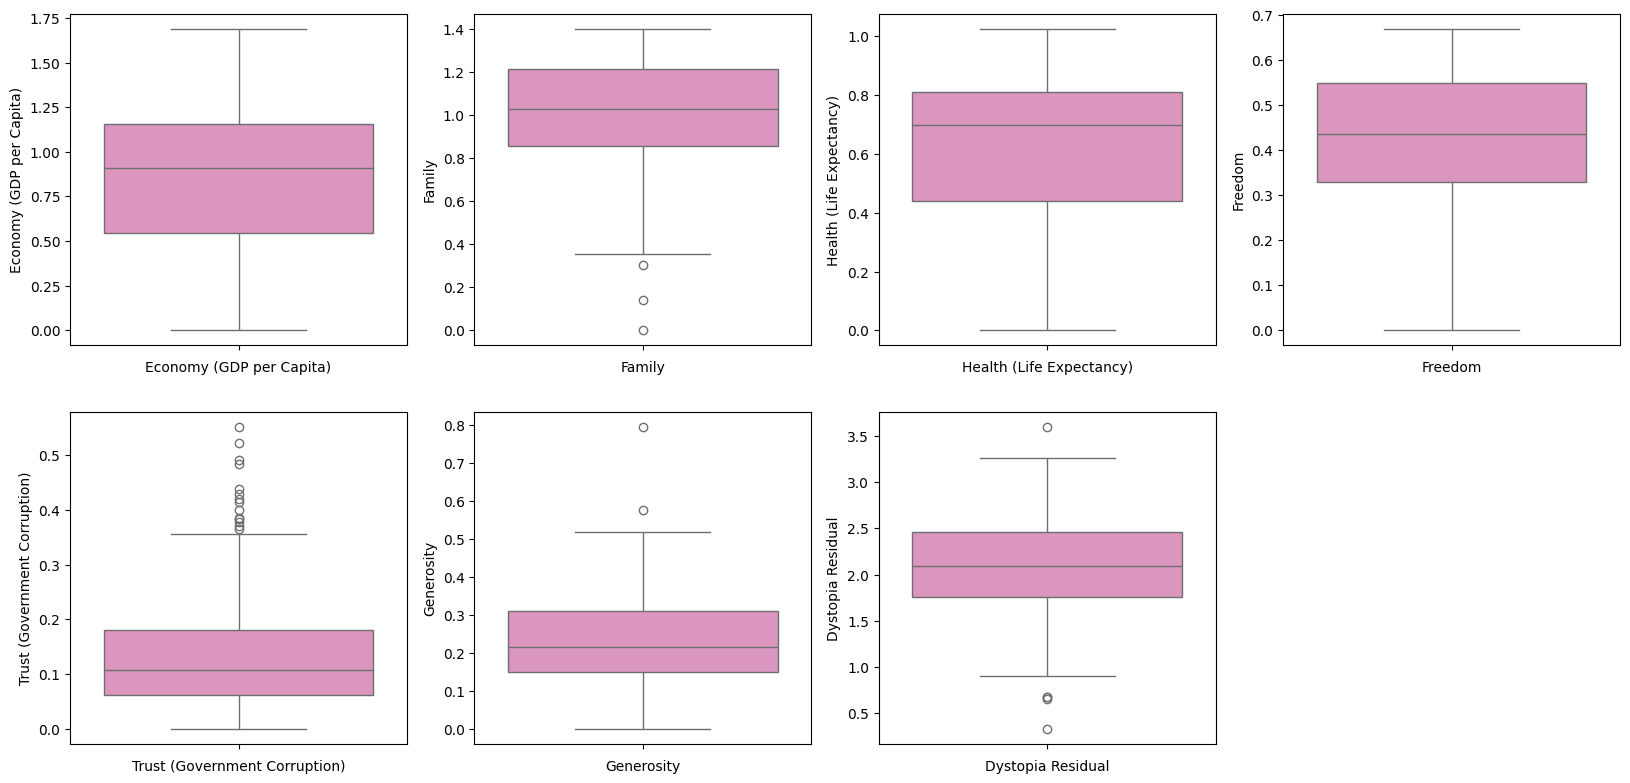

In [41]:
#Let's check the outliers by plotting boxplot
plt.figure(figsize=(20,25))
p=1
for i in df2:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df2[i], palette='Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

In [42]:
from scipy.stats import zscore
out_features = df2[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
z = np.abs(zscore(out_features))
z

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,
1,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
2,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
3,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
4,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
5,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...
154,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
155,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
156,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430


In [43]:
#threshold = 3
np.where(z>3)

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([4, 5, 1, 4, 6, 1], dtype=int64))

In [44]:
z.iloc[27,4]

3.1646194851713774

In [45]:
z.iloc[128,5]

4.423261580434631

In [46]:
z.iloc[147,1]

3.65018347485875

In [47]:
z.iloc[153,4]

3.4139224398643333

In [48]:
z.iloc[155,6]

3.2084304855119403

In [49]:
z.iloc[157,1]

3.1347248549706186

In [50]:
#Now removing the data above Zscore and creating new DF
df3 = df2[(z<3).all(axis=1)]
df3.shape

(152, 7)

In [51]:
#Shape of old and new DataFrame
print("Old DataFrame shape: ", df2.shape[0])
print("New DataFrame shape: ", df3.shape[0])

Old DataFrame shape:  158
New DataFrame shape:  152


In [52]:
print("Data Loss Percentage:", ((df2.shape[0]-df3.shape[0])/df2.shape[0])*100,"%")

Data Loss Percentage: 3.79746835443038 %


In [53]:
df3

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,
1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
151,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
152,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
153,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


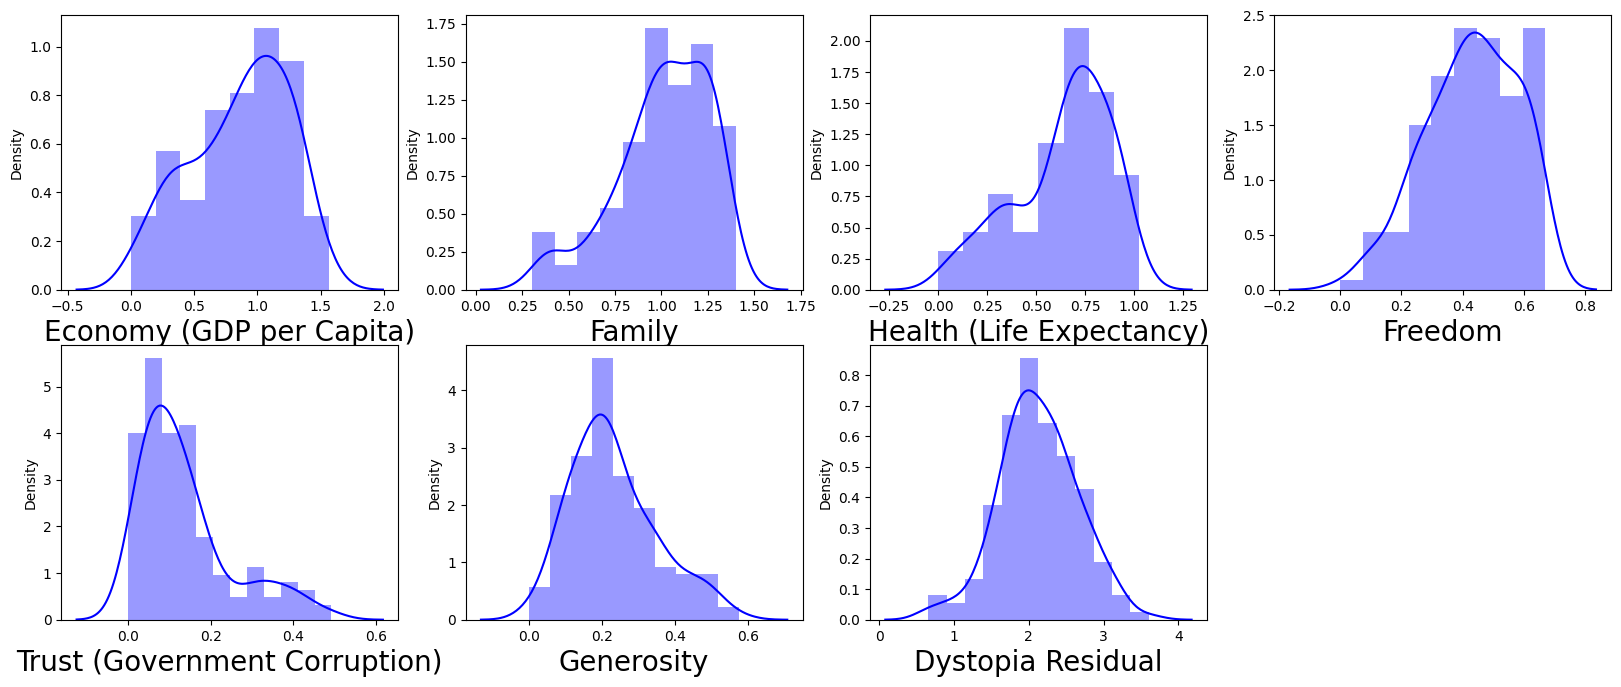

In [54]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in df3:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df3[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [55]:
df3.skew()

Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

In [57]:
df3.corr()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Economy (GDP per Capita),1.000000,0.630432,0.815480,0.385681,0.336776,0.023499,0.010965
Family,0.630432,1.000000,0.506079,0.480175,0.249783,0.155089,0.112209
Health (Life Expectancy),0.815480,0.506079,1.000000,0.385975,0.271506,0.126968,0.021221
Freedom,0.385681,0.480175,0.385975,1.000000,0.492738,0.428216,0.052919
Trust (Government Corruption),0.336776,0.249783,0.271506,0.492738,1.000000,0.288359,0.066669
Generosity,0.023499,0.155089,0.126968,0.428216,0.288359,1.000000,-0.032222
Dystopia Residual,0.010965,0.112209,0.021221,0.052919,0.066669,-0.032222,1.000000


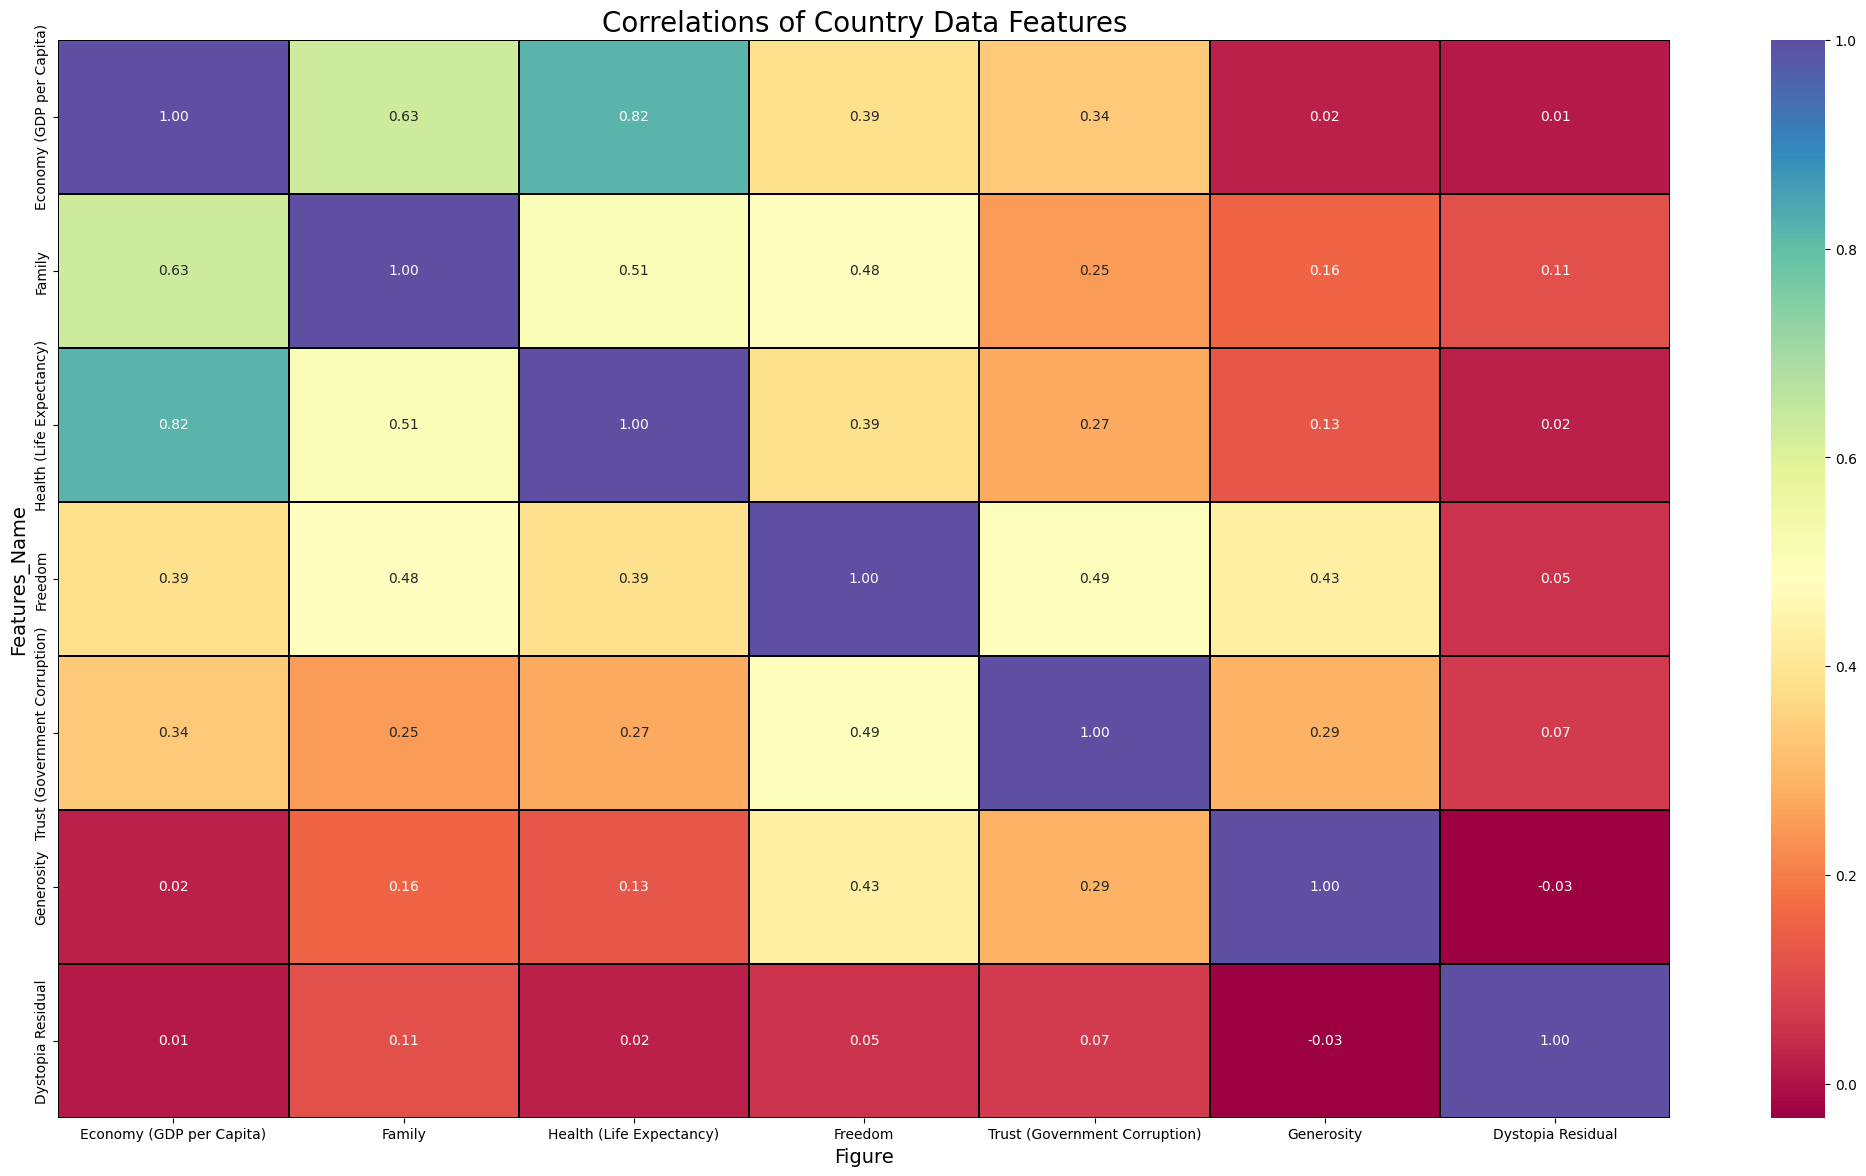

In [62]:
plt.figure(figsize=(26,14))
sns.heatmap(df3.corr(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel("Figure", fontsize=14)
plt.ylabel("Features_Name", fontsize=14)
plt.title("Correlations of Country Data Features", fontsize=20)
plt.show()

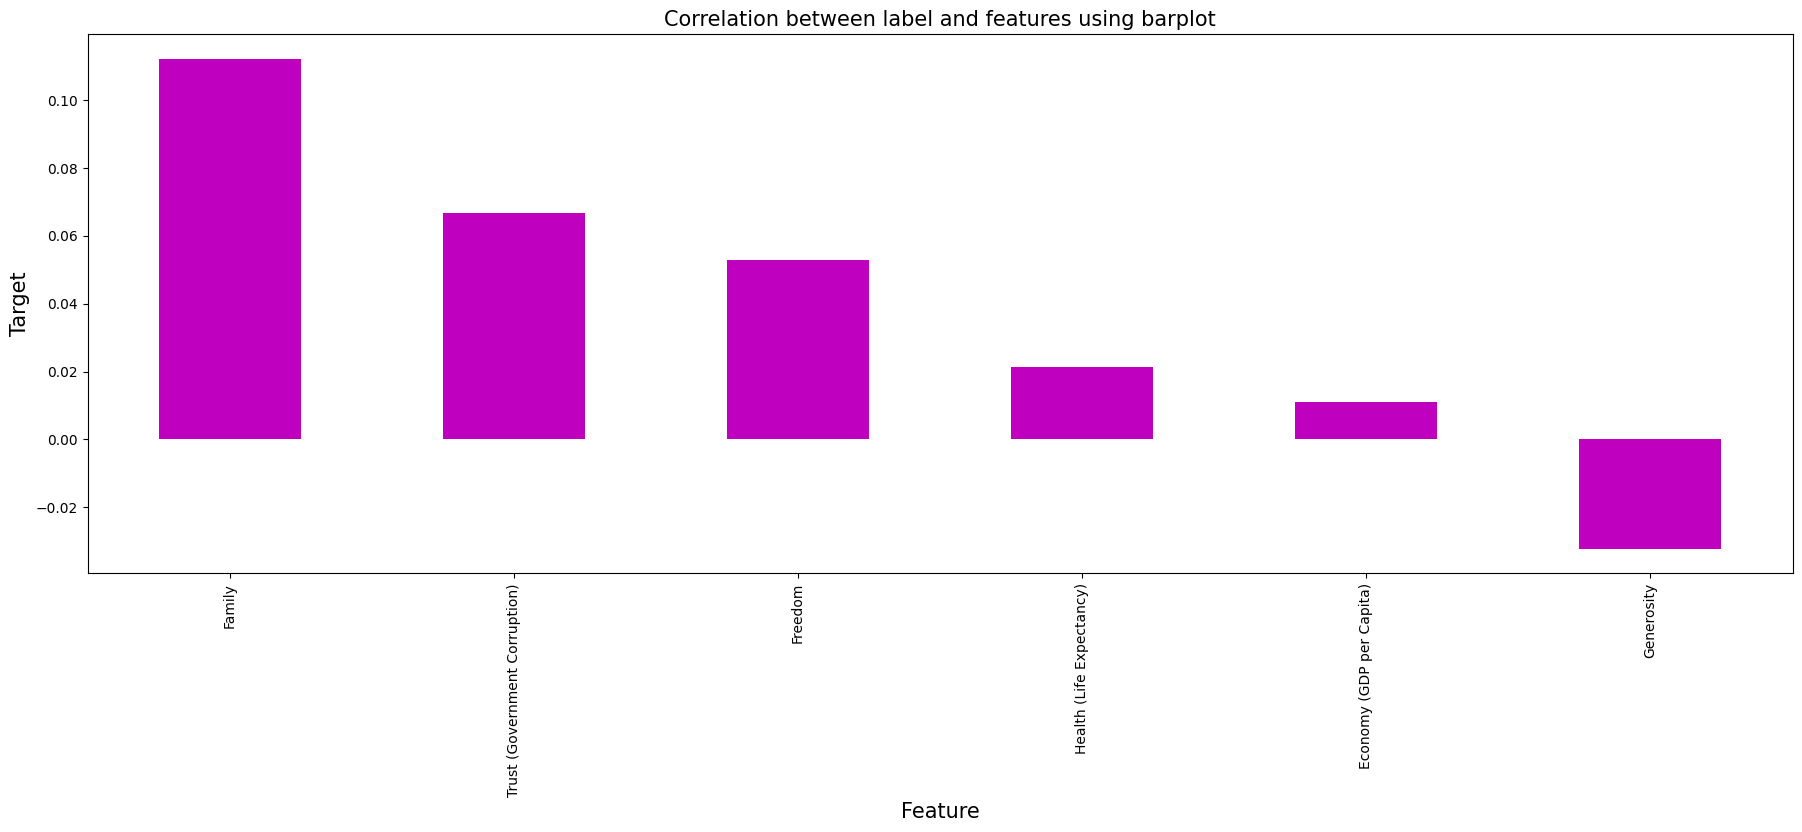

In [66]:
plt.figure(figsize=(22,7))
df3.corr()['Dystopia Residual'].sort_values(ascending=False).drop(['Dystopia Residual']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between label and features using barplot', fontsize=15)
plt.show()

In [67]:
#Seperating the independent and target variables into x and y
x = df3.drop("Dystopia Residual", axis=1)
y = df3["Dystopia Residual"]

print("Feature's Dimension:",x.shape)
print("Label's Dimension:",y.shape)

Feature's Dimension: (152, 6)
Label's Dimension: (152,)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.381206,1.361736,1.248835,1.586462,2.492738,0.546306
1,1.139208,1.572736,1.275116,1.340836,0.028157,1.723375
2,1.198712,1.406041,0.974996,1.478400,3.057591,0.922661
3,1.541758,1.287453,1.018333,1.614229,2.007933,0.969906
4,1.200793,1.254074,1.102055,1.368870,1.693938,1.907376
...,...,...,...,...,...,...
147,-1.011204,-0.953024,-1.988451,0.272162,0.362606,-0.256263
148,-1.543604,-0.629920,-1.498910,-0.219958,-0.088107,-0.122797
149,-1.385081,-2.827293,-1.367300,-1.293171,-0.363760,1.122692
150,-1.470304,-2.623136,-1.302725,0.377888,-0.515090,-0.416980


In [69]:
#Finding variance inflation factor in each scaled column i.e., x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF Values,Features
0,4.072820,Economy (GDP per Capita)
1,1.900926,Family
2,3.148688,Health (Life Expectancy)
3,1.850847,Freedom
4,1.420874,Trust (Government Corruption)
5,1.319818,Generosity


In [70]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu, "on random_state", maxRS)

Maximum r2 score is  0.03677653802123981 on random_state 196


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [74]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(y_test, pred_LR))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_LR)))

LinearRegression()
R2_score: 0.03677653802123981
R2_score on training Data: 0.9960668321862598
Mean Absolute Error: 0.3826866356175061
Mean Squared Error: 0.29035422576940184
Root Mean Squared Error: 0.5388452707126619


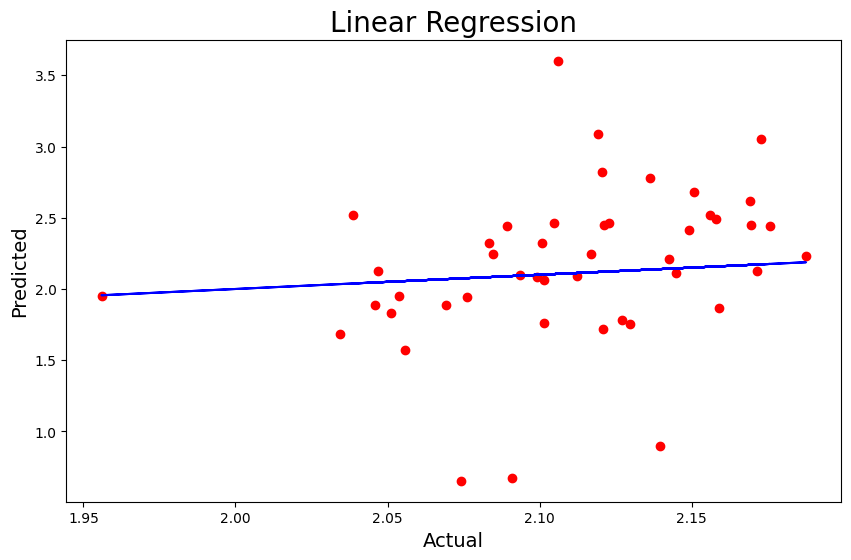

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR, y=y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Linear Regression", fontsize=20)
plt.show()

In [76]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_test, pred_RFR))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_RFR)))

RandomForestRegressor()
R2_score: -0.03393500541694516
R2_score on training Data: 83.59731609960326
Mean Absolute Error: 0.41552178260869566
Mean Squared Error: 0.31166952409672427
Root Mean Suared Error: 0.5582736999865964


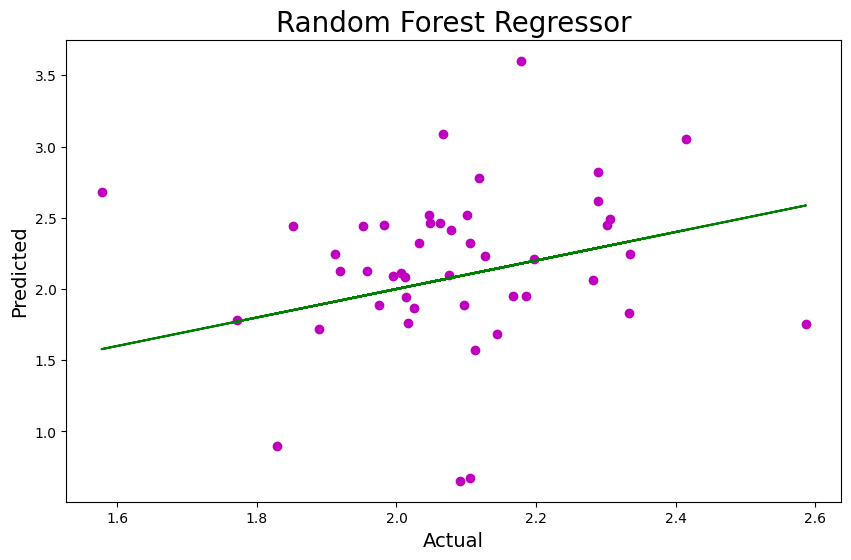

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR, y=y_test, color='m')
plt.plot(pred_RFR, pred_RFR, color='g')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Random Forest Regressor", fontsize=20)
plt.show()

In [78]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test, pred_knn))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test, pred_knn))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_knn)))

KNeighborsRegressor()
R2_score: 0.0484087422391406
R2_score on training Data: 11.871963326307466
Mean Absolute Error: 0.4237696956521738
Mean Squared Error: 0.2868478123741739
Root Mean Suared Error: 0.5355817513453701


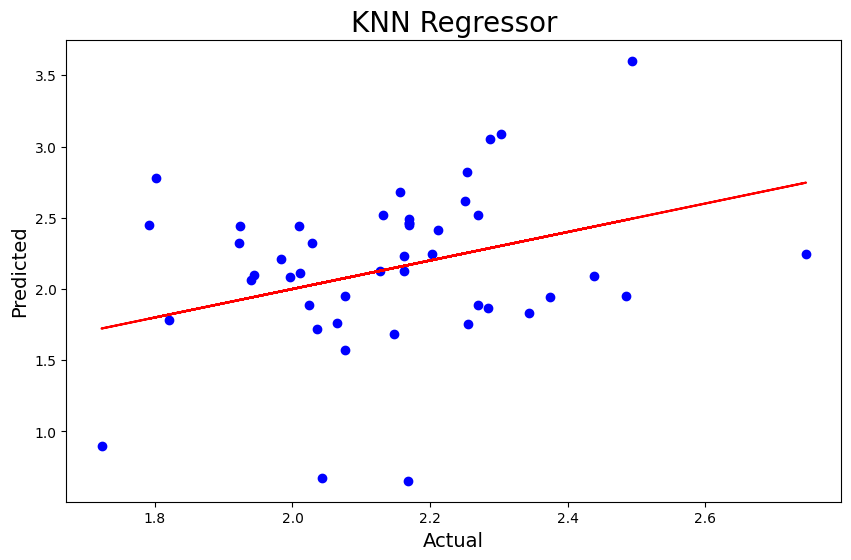

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_knn, y=y_test, color='b')
plt.plot(pred_knn, pred_knn, color='r')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("KNN Regressor", fontsize=20)
plt.show()

In [80]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print(GBR)
print('R2_score:',r2_score(y_test, pred_knn))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.0484087422391406
R2_score on training Data: 94.95487488365761
Mean Absolute Error: 0.4451754319177718
Mean Squared Error: 0.350743088143844
Root Mean Suared Error: 0.592235669428855


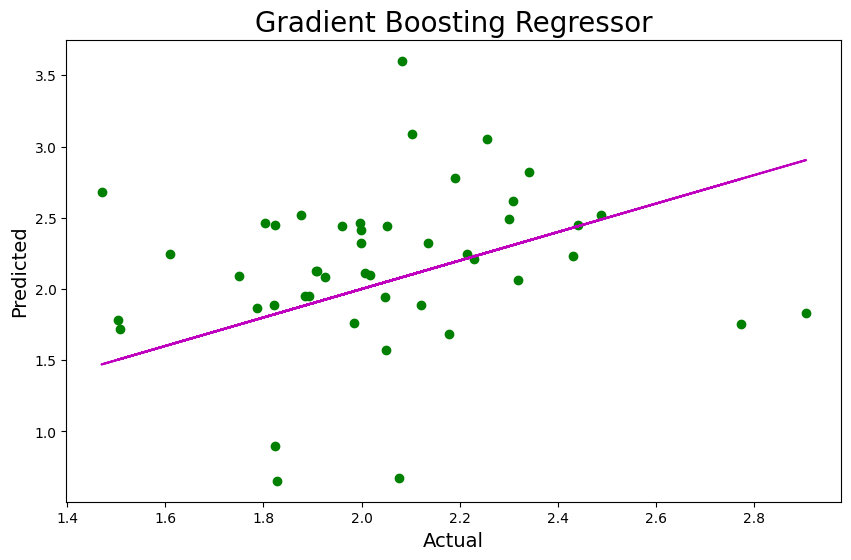

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_GBR, y=y_test, color='g')
plt.plot(pred_GBR, pred_GBR, color='m')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Gradient Boosting Regressor", fontsize=20)
plt.show()

In [82]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print(lasso)
print('R2_score:',r2_score(y_test, pred_lasso))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test, pred_lasso))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_lasso)))

Lasso()
R2_score: -0.007463296396711172
R2_score on training Data: 0.0
Mean Absolute Error: 0.4000056316652994
Mean Squared Error: 0.30368988813398196
Root Mean Suared Error: 0.551080654835553


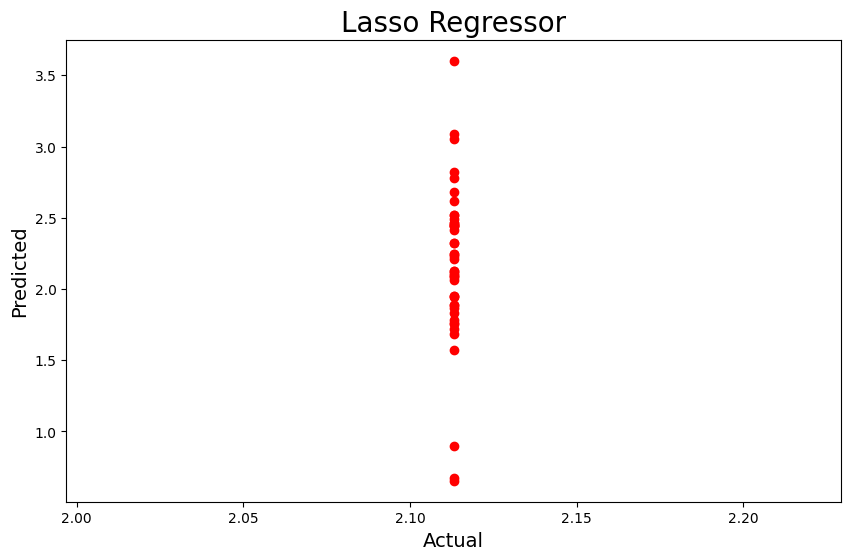

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lasso, y=y_test, color='r')
plt.plot(pred_lasso, pred_lasso, color='g')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Lasso Regressor", fontsize=20)
plt.show()

In [84]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print(rd)
print('R2_score:',r2_score(y_test, pred_rd))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test, pred_rd))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_rd)))

Ridge()
R2_score: 0.03569736427893733
R2_score on training Data: 0.9947757796853973
Mean Absolute Error: 0.38300371826626817
Mean Squared Error: 0.2906795320651737
Root Mean Suared Error: 0.5391470412282476


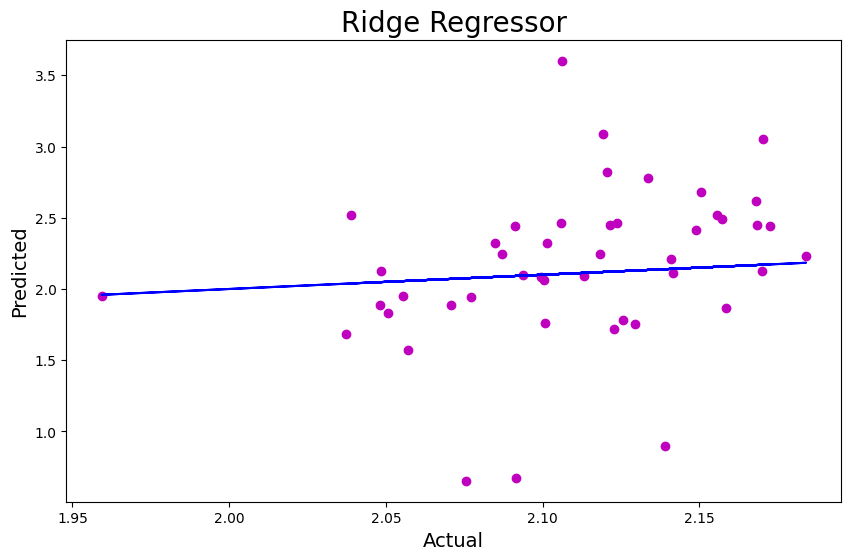

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_rd, y=y_test, color='m')
plt.plot(pred_rd, pred_rd, color='b')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Ridge Regressor", fontsize=20)
plt.show()

In [86]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test, pred_dtr))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test, pred_dtr))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_dtr)))

DecisionTreeRegressor()
R2_score: -0.38958228925737237
R2_score on training Data: 100.0
Mean Absolute Error: 0.5064741304347827
Mean Squared Error: 0.4188758950195652
Root Mean Suared Error: 0.6472062229456429


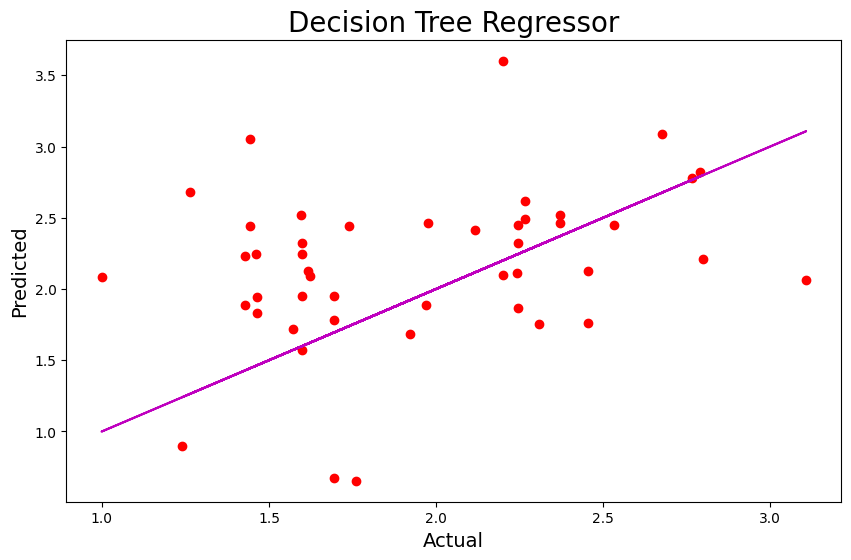

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_dtr, y=y_test, color='r')
plt.plot(pred_dtr, pred_dtr, color='m')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Decision Tree Regressor", fontsize=20)
plt.show()

In [88]:
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print(svr)
print('R2_score:',r2_score(y_test, pred_svr))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test, pred_svr))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_svr)))

SVR()
R2_score: 0.023553191942829232
R2_score on training Data: 38.801675245089115
Mean Absolute Error: 0.4234718745736059
Mean Squared Error: 0.2943402732072314
Root Mean Suared Error: 0.542531356888458


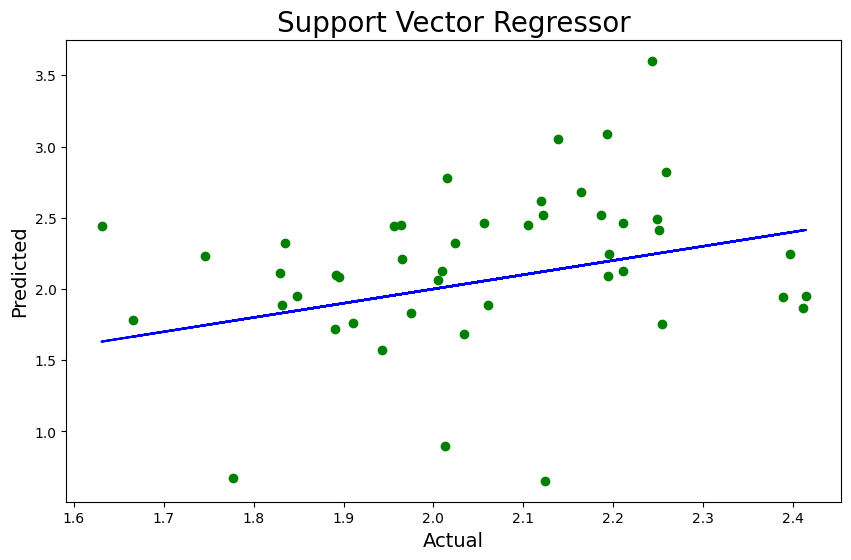

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_svr, y=y_test, color='g')
plt.plot(pred_svr, pred_svr, color='b')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Support Vector Regressor", fontsize=20)
plt.show()

In [90]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test, pred_etr))
print('R2_score on training Data:',r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test, pred_etr))
print('Root Mean Suared Error:',np.sqrt(mean_squared_error(y_test, pred_etr)))

ExtraTreesRegressor()
R2_score: 0.06142632870251008
R2_score on training Data: 100.0
Mean Absolute Error: 0.3958357499999999
Mean Squared Error: 0.28292378914576
Root Mean Suared Error: 0.5319058085279386


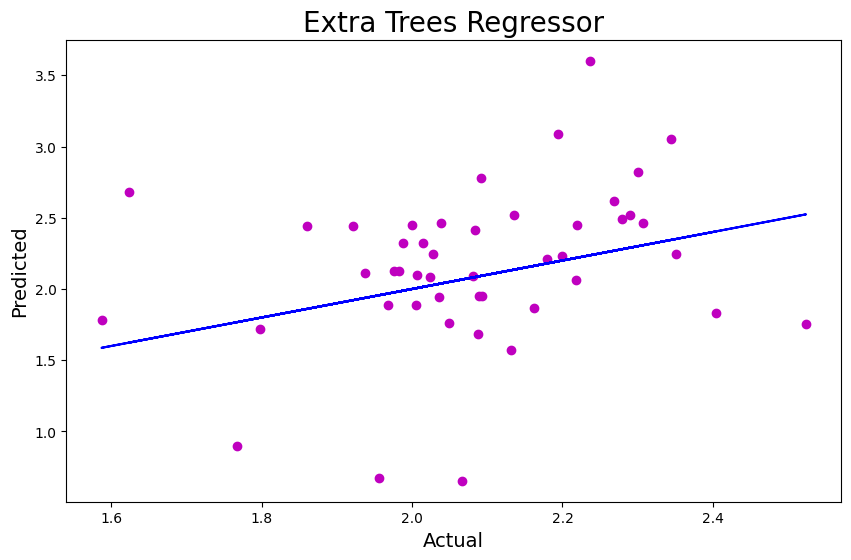

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_etr, y=y_test, color='m')
plt.plot(pred_etr, pred_etr, color='b')
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.title("Extra Trees Regressor", fontsize=20)
plt.show()

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
#Checking CV score for Linear Regressor
score = cross_val_score(LR, x, y, cv=5, scoring='r2')
print(score)
print("Mean CV Score: ", score.mean())
print("R2 Score: ", r2_score(y_test, pred_LR))
print("Difference between R2 Score and Cross Validation Score is: ", (r2_score(y_test, pred_LR) - score.mean())*100)

[-3.68190979 -0.39063823 -0.39188221 -0.30996426 -3.02707221]
Mean CV Score:  -1.560293339030442
R2 Score:  0.03677653802123981
Difference between R2 Score and Cross Validation Score is:  159.7069877051682


In [94]:
#Checking CV score for RFR
score1 = cross_val_score(RFR, x, y)
print(score1)
print("Mean CV Score: ", score1.mean())
print("R2 Score: ", r2_score(y_test, pred_RFR))
print("Difference between R2 Score and Cross Validation Score is: ", (r2_score(y_test, pred_RFR) - score1.mean())*100)

[-3.58711408 -1.04154401 -0.32051154 -0.76406316 -3.10943756]
Mean CV Score:  -1.7645340711054995
R2 Score:  -0.03393500541694516
Difference between R2 Score and Cross Validation Score is:  173.05990656885544


In [95]:
#Checking CV score for knn
score2 = cross_val_score(knn, x, y)
print(score2)
print("Mean CV Score: ", score2.mean())
print("R2 Score: ", r2_score(y_test, pred_knn))
print("Difference between R2 Score and Cross Validation Score is: ", (r2_score(y_test, pred_knn) - score2.mean())*100)

[-3.39737236 -1.36878056 -0.74532104 -0.97223312 -2.93138986]
Mean CV Score:  -1.883019387177986
R2 Score:  0.0484087422391406
Difference between R2 Score and Cross Validation Score is:  193.14281294171266


In [96]:
#Checking CV score for GBR
score3 = cross_val_score(GBR, x, y)
print(score3)
print("Mean CV Score: ", score3.mean())
print("R2 Score: ", r2_score(y_test, pred_GBR))
print("Difference between R2 Score and Cross Validation Score is: ", (r2_score(y_test, pred_GBR) - score3.mean())*100)

[-5.35128667 -1.30787183 -0.4282594  -1.07289197 -3.21963102]
Mean CV Score:  -2.275988177011855
R2 Score:  -0.16355796349025464
Difference between R2 Score and Cross Validation Score is:  211.24302135216
